In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('D:\GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [2]:
df.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False
2,False,True,True,False,False,False,False
3,False,True,True,False,False,False,False
4,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False
8599210,False,False,False,False,False,False,False


In [3]:
df.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [4]:
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [6]:
df['dt']=pd.to_datetime(df['dt'])
df['year']=df['dt'].dt.year
mean_temp=df.groupby('year')['AverageTemperature'].mean()
print(mean_temp)

year
1743     4.882424
1744    10.734047
1745     1.497593
1750     9.872808
1751    10.046739
          ...    
2009    18.601106
2010    18.553508
2011    18.393315
2012    18.525969
2013    19.061038
Name: AverageTemperature, Length: 267, dtype: float64


In [7]:
mav_avg_temp=df.groupby('City')['AverageTemperature'].max()
print(mav_avg_temp)

City
A Coruña    22.052
Aachen      22.812
Aalborg     20.883
Aba         30.036
Abadan      38.531
             ...  
Århus       20.883
Çorlu       26.891
Çorum       24.746
Öskemen     22.229
Ürümqi      26.092
Name: AverageTemperature, Length: 3448, dtype: float64


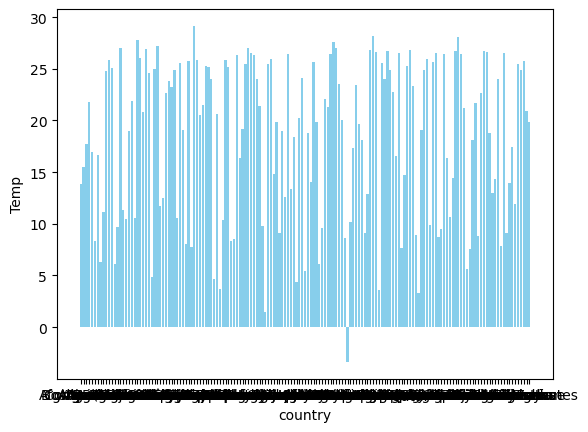

In [23]:
high_avg_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
plt.bar(high_avg_temp['Country'], high_avg_temp['AverageTemperature'], color='skyblue')
plt.xlabel('country')
plt.ylabel('Temp')
plt.show()

In [15]:
country_avg_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
top_countries=country_avg_temp.sort_values(by='AverageTemperature',ascending=False)
print(top_countries)

          Country  AverageTemperature
40       Djibouti           29.152790
103         Niger           28.145552
133         Sudan           28.072831
20   Burkina Faso           27.815295
89           Mali           27.590491
..            ...                 ...
49        Finland            3.711645
105        Norway            3.612553
119        Russia            3.347268
65        Iceland            1.500089
94       Mongolia           -3.365485

[159 rows x 2 columns]


In [44]:
df_cleaned = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

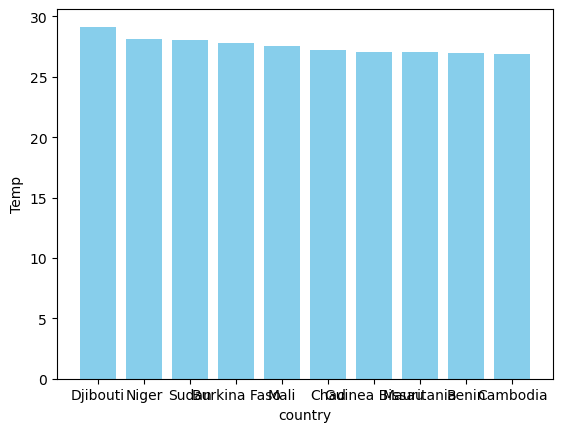

In [22]:
country_avg_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
top_countries=country_avg_temp.sort_values(by='AverageTemperature',ascending=False)
a=top_countries.head(10)
plt.bar(a['Country'], a['AverageTemperature'], color='skyblue')
plt.xlabel('country')
plt.ylabel('Temp')
plt.show()

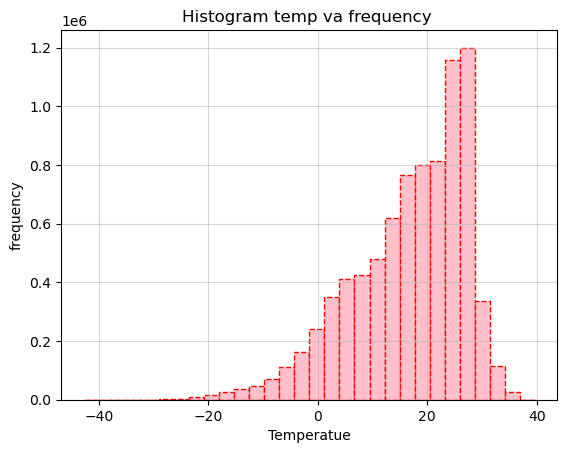

In [54]:
temp_data=df['AverageTemperature'].dropna()
plt.hist(temp_data,bins=30,color="pink",edgecolor="red",linestyle='--')
plt.xlabel('Temperatue')
plt.ylabel('frequency')
plt.title('Histogram temp va frequency ')
plt.grid(alpha=0.5)
plt.show()

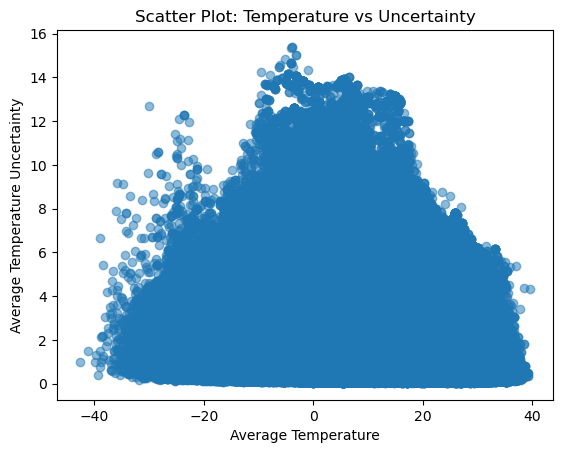

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
df_cleaned = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
plt.scatter(df_cleaned['AverageTemperature'], df_cleaned['AverageTemperatureUncertainty'], alpha=0.5)
plt.title('Scatter Plot: Temperature vs Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('Average Temperature Uncertainty')
plt.show()


In [52]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'year'],
      dtype='object')

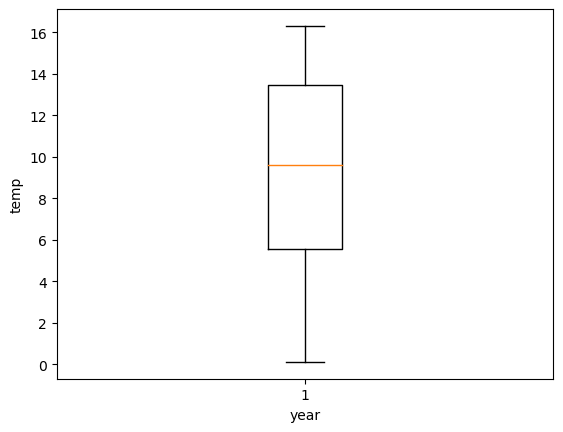

In [75]:
country='Denmark'
yr=1744
a = df[(df['Country'] == country) & (df['year'] == yr)]
plt.boxplot(x=a['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('temp')
plt.show()

In [67]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


In [79]:
import seaborn as sns
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


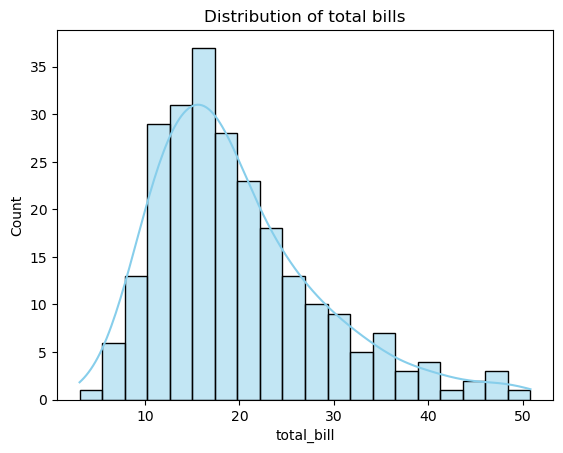

In [80]:
sns.histplot(data=tips,x='total_bill',bins=20,color="skyblue",kde=True)
plt.title("Distribution of total bills")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_14412\4055111069.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips,x="total_bill",shade=True,color="purple")


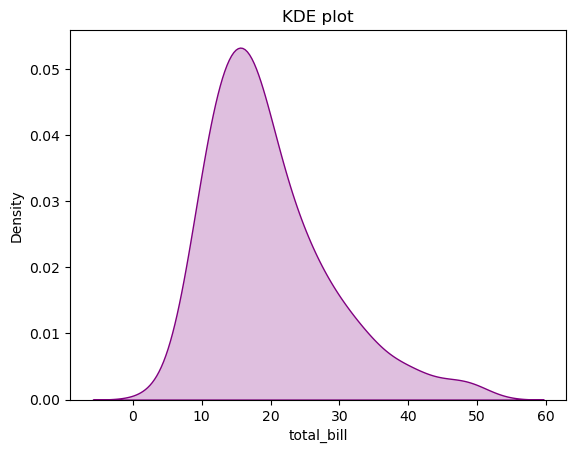

In [82]:
sns.kdeplot(data=tips,x="total_bill",shade=True,color="purple")
plt.title("KDE plot")
plt.show()

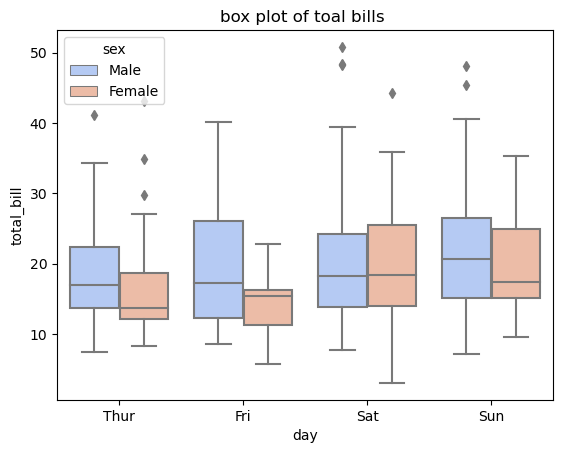

In [83]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("box plot of toal bills ")
plt.show()

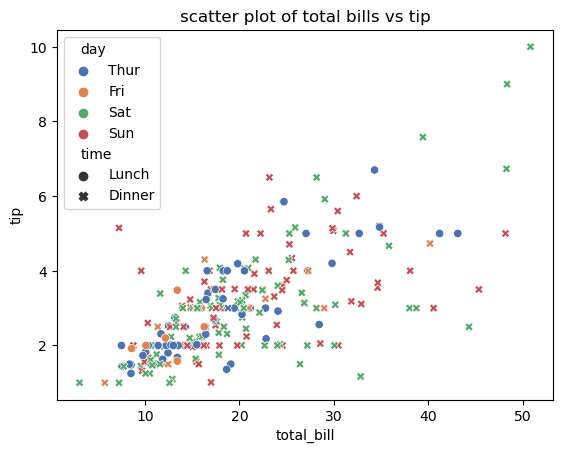

In [85]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("scatter plot of total bills vs tip")
plt.show()

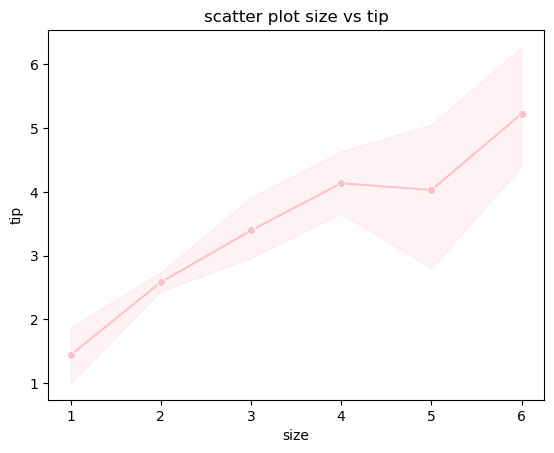

In [87]:
sns.lineplot(data=tips,x="size",y="tip",marker='o',color="pink")
plt.title("scatter plot size vs tip")
plt.xlabel("size")
plt.ylabel("tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


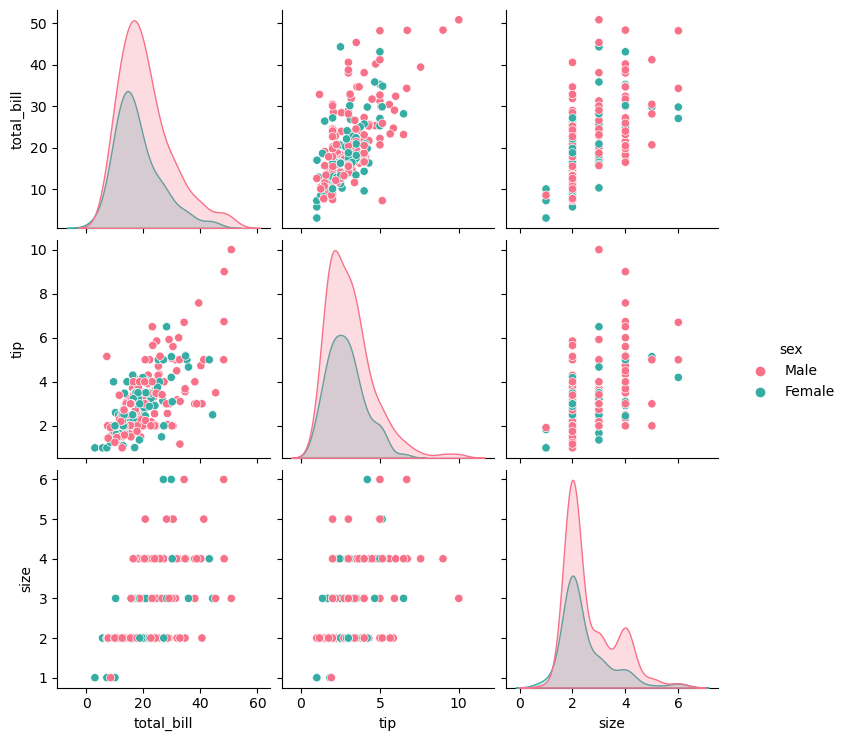

In [88]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

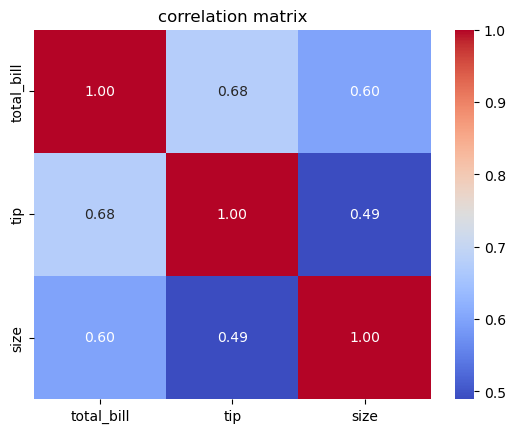

In [92]:
numeric_cols=tips.select_dtypes(include=['number'])
cor_mat=numeric_cols.corr()
sns.heatmap(cor_mat,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation matrix")
plt.show()